In [2]:
import pandas as pd

In [4]:
file_path = '/Users/aselvara/Downloads/Oasis_infobyte/spam.csv'
data = pd.read_csv(file_path, encoding='latin-1')

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [12]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])


In [14]:
data.columns = ['label', 'message']

In [16]:
print(data.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)


In [22]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

4457 1115 4457 1115


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer(stop_words='english')

In [28]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [30]:
X_test_tfidf = vectorizer.transform(X_test)

In [32]:
from sklearn.naive_bayes import MultinomialNB


In [34]:
model = MultinomialNB()

In [36]:
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
y_pred = model.predict(X_test_tfidf)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9668161434977578
Precision: 1.0
Recall: 0.7533333333333333
F1 Score: 0.8593155893536121


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

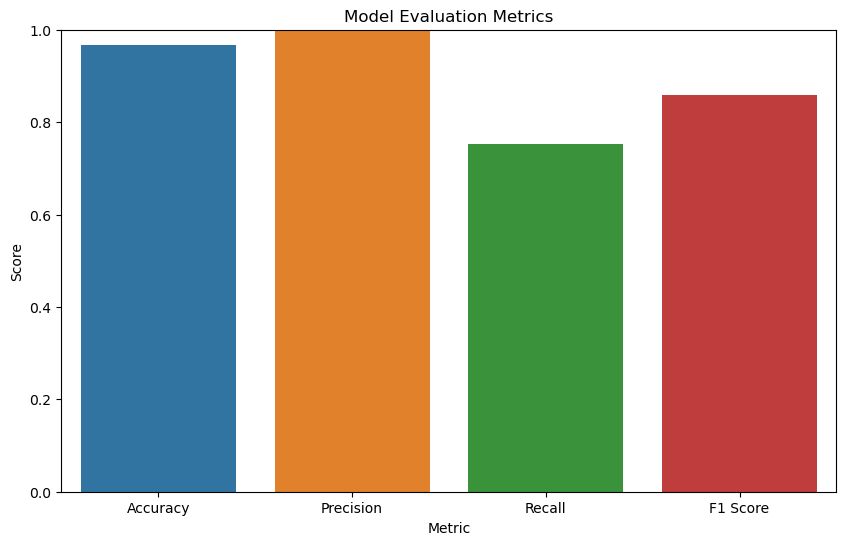

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df)
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [54]:
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

In [56]:
results = {}
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['spam']['precision'],
        'Recall': report['spam']['recall'],
        'F1 Score': report['spam']['f1-score']
    }

In [58]:
results_df = pd.DataFrame(results).T


In [60]:
print("\nComparison of Different Models:")
print(results_df)


Comparison of Different Models:
                         Accuracy  Precision    Recall  F1 Score
Multinomial Naive Bayes  0.966816   1.000000  0.753333  0.859316
Logistic Regression      0.952466   0.970874  0.666667  0.790514
Support Vector Machine   0.976682   0.992063  0.833333  0.905797
Random Forest            0.973991   0.991870  0.813333  0.893773


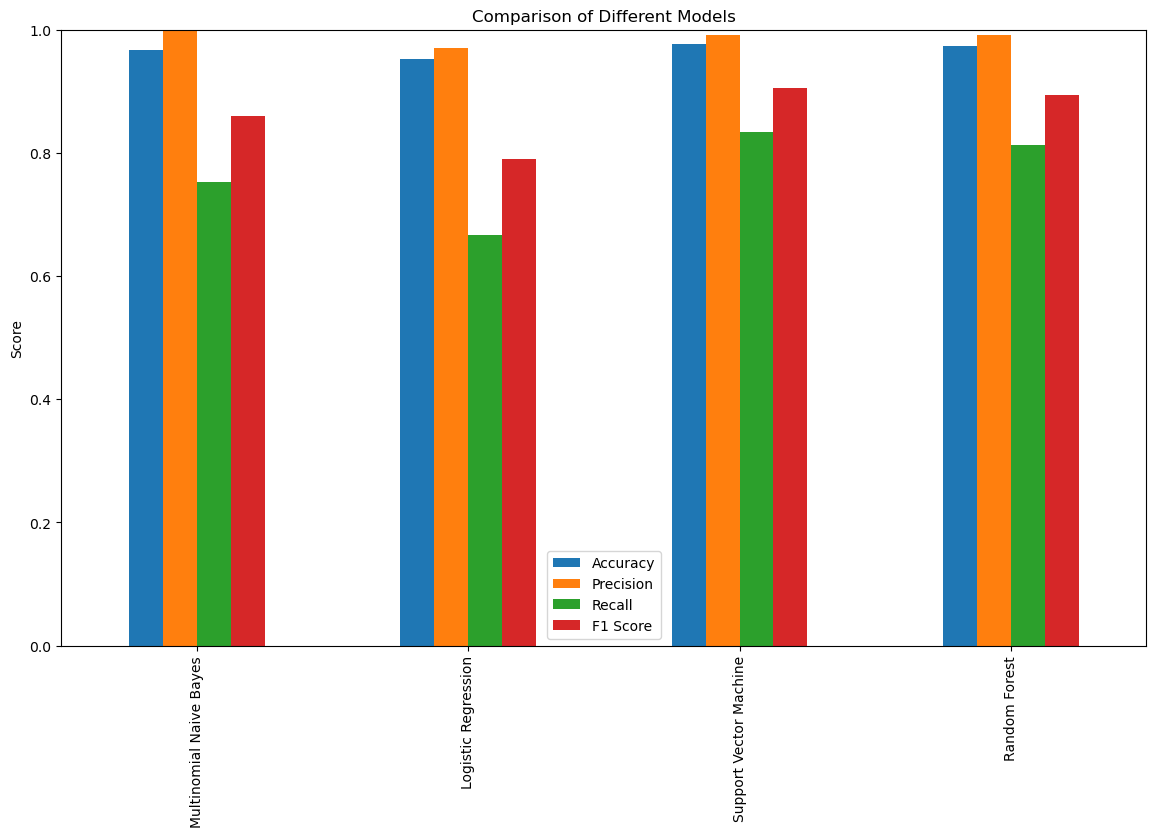

In [62]:
results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Different Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()